In [1]:
import numpy as np
import pandas as pd
import os
import missingno
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
yield_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\yield.csv")
temp_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\temp.csv")
rainfall_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\rainfall.csv")
pesticides_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\pesticides.csv")

In [3]:
yield_data.head(10)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144
7,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1968,1968,hg/ha,17064
8,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1969,1969,hg/ha,17177
9,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1970,1970,hg/ha,14757


In [4]:
needed = ['Area','Item','Year','Value']
yield_data = yield_data[needed]

In [5]:
temp_data.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_data.head(10)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
9,1858,Côte D'Ivoire,25.49


In [6]:
rainfall_data.head(10)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327
7,Afghanistan,1993,327
8,Afghanistan,1994,327
9,Afghanistan,1995,327


In [7]:
pesticides_data.head(10)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96
7,Pesticides Use,Albania,Use,Pesticides (total),1997,tonnes of active ingredients,376.93
8,Pesticides Use,Albania,Use,Pesticides (total),1998,tonnes of active ingredients,439.89
9,Pesticides Use,Albania,Use,Pesticides (total),1999,tonnes of active ingredients,502.86


In [8]:
needed = ['Area','Year','Value']
pesticides_data = pesticides_data[needed]

In [9]:
print("pesticides -- > ",pesticides_data.shape)
print("rainfall -- > ",rainfall_data.shape)
print("temp -- > ",temp_data.shape)
print("yield -- > ",yield_data.shape)

pesticides -- >  (4349, 3)
rainfall -- >  (6727, 3)
temp -- >  (71311, 3)
yield -- >  (56717, 4)


In [10]:
temp_data= temp_data[temp_data.Year >= 1961]
yield_final = pd.merge(yield_data,temp_data,on=['Year','Area'])
yield_final = pd.merge(yield_final,pesticides_data,on=['Year','Area'])
yield_final.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace = True)
yield_final = pd.merge(yield_final,rainfall_data,on=['Year','Area'])
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

In [11]:
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

In [12]:
yield_final.shape

(28248, 7)

In [13]:
yield_final.head(7)

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485.0
1,Albania,Potatoes,1990,66667,16.37,121.0,1485.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485.0
3,Albania,Sorghum,1990,12500,16.37,121.0,1485.0
4,Albania,Soybeans,1990,7000,16.37,121.0,1485.0
5,Albania,Wheat,1990,30197,16.37,121.0,1485.0
6,Albania,Maize,1991,29068,15.36,121.0,1485.0


In [14]:
import pandas as pd

yield_final = yield_final.fillna(pd.NA)
nan_counts = yield_final.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Area                0
Item                0
Year                0
Yield_Value         0
avg_temp            0
Pesticides_Value    0
average_rain        6
dtype: int64


In [15]:
from sklearn.ensemble import IsolationForest
import pandas as pd
iso_forest = IsolationForest()
average_rain_data = yield_final[['average_rain']]
average_rain_cleaned = average_rain_data.dropna()
iso_forest.fit(average_rain_cleaned)
outliers = iso_forest.predict(average_rain_cleaned)
median_rain = average_rain_cleaned.loc[outliers == 1].median()
yield_final['average_rain'].fillna(median_rain[0], inplace=True)

In [16]:
import pandas as pd

yield_final = yield_final.fillna(pd.NA)
nan_counts = yield_final.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Area                0
Item                0
Year                0
Yield_Value         0
avg_temp            0
Pesticides_Value    0
average_rain        0
dtype: int64


In [17]:
yield_final = yield_final[['Area','Item','Year','avg_temp','Pesticides_Value','average_rain','Yield_Value']]
yield_final

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.00,1485.0,36613
1,Albania,Potatoes,1990,16.37,121.00,1485.0,66667
2,Albania,"Rice, paddy",1990,16.37,121.00,1485.0,23333
3,Albania,Sorghum,1990,16.37,121.00,1485.0,12500
4,Albania,Soybeans,1990,16.37,121.00,1485.0,7000
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,19.76,2550.07,657.0,22581
28244,Zimbabwe,Sorghum,2013,19.76,2550.07,657.0,3066
28245,Zimbabwe,Soybeans,2013,19.76,2550.07,657.0,13142
28246,Zimbabwe,Sweet potatoes,2013,19.76,2550.07,657.0,22222


In [18]:
yield_final['Pesticides_log']= np.log(yield_final['Pesticides_Value'])

In [19]:
yield_final.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log
0,Albania,Maize,1990,16.37,121.0,1485.0,36613,4.795791
1,Albania,Potatoes,1990,16.37,121.0,1485.0,66667,4.795791
2,Albania,"Rice, paddy",1990,16.37,121.0,1485.0,23333,4.795791
3,Albania,Sorghum,1990,16.37,121.0,1485.0,12500,4.795791
4,Albania,Soybeans,1990,16.37,121.0,1485.0,7000,4.795791
5,Albania,Wheat,1990,16.37,121.0,1485.0,30197,4.795791
6,Albania,Maize,1991,15.36,121.0,1485.0,29068,4.795791


In [20]:
yield_final.describe()

,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,37069.136973,1148.972918,77047.863282,8.960577
std,7.052997,6.311828,59954.787836,709.759638,84950.194454,2.515683
min,1990.000000,1.300000,0.040000,51.000000,50.000000,-3.218876
25%,1995.000000,16.710000,1695.710000,593.000000,19918.750000,7.435857
50%,2001.000000,21.510000,17517.760000,1083.000000,38295.000000,9.770971
75%,2008.000000,26.000000,48687.880000,1668.000000,104598.250000,10.793185
max,2013.000000,30.650000,367778.000000,3240.000000,501412.000000,12.815235


In [21]:
datacorr=yield_final.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

In [23]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log
0,0,1,1990,16.37,121.0,1485.0,36613,4.795791
1,0,3,1990,16.37,121.0,1485.0,66667,4.795791
2,0,4,1990,16.37,121.0,1485.0,23333,4.795791
3,0,5,1990,16.37,121.0,1485.0,12500,4.795791
4,0,6,1990,16.37,121.0,1485.0,7000,4.795791
5,0,8,1990,16.37,121.0,1485.0,30197,4.795791
6,0,1,1991,15.36,121.0,1485.0,29068,4.795791


In [24]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    columns_to_check = [col for col in columns if col in numerical_columns]
    
    Q1 = df[columns_to_check].quantile(0.25)
    Q3 = df[columns_to_check].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)
    df_filtered = df[~mask]
    
    return df_filtered

columns_to_check = ['Area','Item','Year','avg_temp','Pesticides_Value','average_rain','Yield_Value']
datacorr_filtered = remove_outliers_iqr(datacorr, columns_to_check)

print("Original Shape:", datacorr.shape)
print("Filtered Shape:", datacorr_filtered.shape)


Original Shape: (28248, 8)
Filtered Shape: (24821, 8)


In [25]:
yield_final = datacorr_filtered.copy()

In [26]:
yield_final.shape

(24821, 8)

In [27]:
yield_final['rain_temp']= yield_final['avg_temp'] * yield_final['average_rain']
yield_final['Pesticides_rain']= np.log(yield_final['Pesticides_Value'] / yield_final['average_rain'])
yield_final['Pesticides_temp']= np.log(yield_final['Pesticides_Value'] / yield_final['avg_temp'])
yield_final['Pesticides_temp_rain']= (yield_final['Pesticides_temp'] / yield_final['Pesticides_rain'])
yield_final['rain_log']= np.log(yield_final['avg_temp'])
yield_final['temp_rainlog']=yield_final['avg_temp'] /  yield_final['rain_log']
num_cols=['avg_temp', 'Pesticides_Value', 'average_rain','rain_temp','Pesticides_rain','Pesticides_temp','Pesticides_temp_rain','Pesticides_log','rain_log','temp_rainlog','Yield_Value']
corr_matrix = yield_final[num_cols].corr()
corr_matrix["Yield_Value"].sort_values(ascending=False)

Yield_Value             1.000000
Pesticides_log          0.075180
Pesticides_temp         0.075152
average_rain            0.071909
Pesticides_Value        0.064299
rain_temp               0.059061
Pesticides_rain         0.058087
Pesticides_temp_rain   -0.004971
avg_temp               -0.011762
temp_rainlog           -0.012928
rain_log               -0.017373
Name: Yield_Value, dtype: float64

In [28]:
datacorr=yield_final.copy()

In [29]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log,rain_temp,Pesticides_rain,Pesticides_temp,Pesticides_temp_rain,rain_log,temp_rainlog
0,0,1,1990,16.37,121.0,1485.0,36613,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
1,0,3,1990,16.37,121.0,1485.0,66667,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
2,0,4,1990,16.37,121.0,1485.0,23333,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
3,0,5,1990,16.37,121.0,1485.0,12500,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
4,0,6,1990,16.37,121.0,1485.0,7000,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
5,0,8,1990,16.37,121.0,1485.0,30197,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944
6,0,1,1991,15.36,121.0,1485.0,29068,4.795791,22809.60,-2.50738,2.064024,-0.823180,2.731767,5.622735


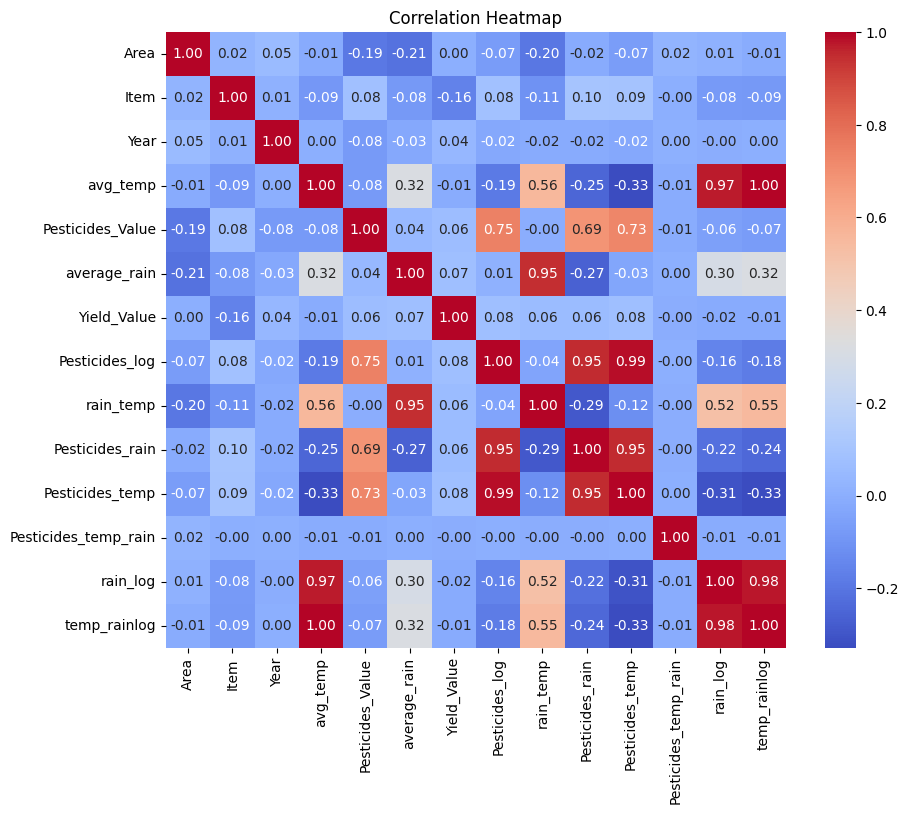

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = datacorr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [31]:
import numpy as np
import pandas as pd

# Assuming 'datacorr' is your DataFrame with the column "Yield_Value"
datacorr["Yield_Value_Cat"] = pd.cut(datacorr["Yield_Value"],
                                     bins=[0., 50000, 150000, np.inf],
                                     labels=[0, 1, 2])

datacorr = datacorr.drop("Yield_Value", axis=1)

print(datacorr.head())


   Area  Item  Year  avg_temp  Pesticides_Value  average_rain  Pesticides_log   
0     0     1  1990     16.37             121.0        1485.0        4.795791  \
1     0     3  1990     16.37             121.0        1485.0        4.795791   
2     0     4  1990     16.37             121.0        1485.0        4.795791   
3     0     5  1990     16.37             121.0        1485.0        4.795791   
4     0     6  1990     16.37             121.0        1485.0        4.795791   

   rain_temp  Pesticides_rain  Pesticides_temp  Pesticides_temp_rain   
0   24309.45         -2.50738          2.00034             -0.797781  \
1   24309.45         -2.50738          2.00034             -0.797781   
2   24309.45         -2.50738          2.00034             -0.797781   
3   24309.45         -2.50738          2.00034             -0.797781   
4   24309.45         -2.50738          2.00034             -0.797781   

   rain_log  temp_rainlog Yield_Value_Cat  
0   2.79545      5.855944           

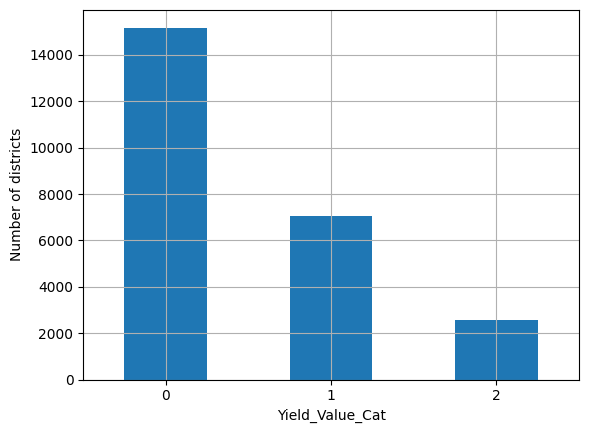

In [32]:
import matplotlib.pyplot as plt
datacorr["Yield_Value_Cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Yield_Value_Cat")
plt.ylabel("Number of districts")
plt.show()

In [33]:
value_counts = datacorr['Yield_Value_Cat'].value_counts()
is_balanced = all(count == value_counts.iloc[0] for count in value_counts)
print("Are all values balanced?:", is_balanced)

Are all values balanced?: False


In [34]:
from imblearn.over_sampling import RandomOverSampler

X = datacorr.drop("Yield_Value_Cat", axis=1)
y = datacorr["Yield_Value_Cat"]

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

datacorr = pd.concat([X_resampled, y_resampled], axis=1)

balanced_counts = datacorr['Yield_Value_Cat'].value_counts()
print("Balanced class counts:")
print(balanced_counts)


Balanced class counts:
Yield_Value_Cat
0    15180
1    15180
2    15180
Name: count, dtype: int64


In [35]:
datacorr.shape

(45540, 14)

In [36]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Pesticides_log,rain_temp,Pesticides_rain,Pesticides_temp,Pesticides_temp_rain,rain_log,temp_rainlog,Yield_Value_Cat
0,0,1,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,0
1,0,3,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,1
2,0,4,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,0
3,0,5,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,0
4,0,6,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,0
5,0,8,1990,16.37,121.0,1485.0,4.795791,24309.45,-2.50738,2.000340,-0.797781,2.795450,5.855944,0
6,0,1,1991,15.36,121.0,1485.0,4.795791,22809.60,-2.50738,2.064024,-0.823180,2.731767,5.622735,0


In [37]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'datacorr' is your DataFrame
# If not already imported, import the required libraries

# Drop the target variable from the DataFrame if it's included
# Assuming 'Yield_Value_Cat' is the target variable
X = datacorr.drop('Yield_Value_Cat', axis=1)
y = datacorr['Yield_Value_Cat']

# Check for any remaining NaN values and handle them if needed
X.fillna(0, inplace=True)  # Replace NaN with 0, you can choose a different strategy if needed

# Perform correlation analysis
correlation_matrix = X.corr()

# Assuming you want to keep features with correlation above a certain threshold
threshold = 2.5  # Adjust as needed
high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_features.add(colname)

# Remove high correlated features
X_selected = X.drop(high_correlation_features, axis=1)

# Perform Recursive Feature Elimination (RFE) with Random Forest
rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=5)  # Choose the number of features to select
X_rfe = rfe.fit_transform(X_selected, y)

# Get the selected feature names
selected_feature_names = X_selected.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Area', 'Item', 'rain_temp', 'Pesticides_rain', 'Pesticides_temp'], dtype='object')


In [38]:
selected_cols = ['Year', 'Area', 'Item', 'rain_temp', 'Pesticides_rain', 'Pesticides_temp', 'Yield_Value_Cat']
datacorr_selected = datacorr[selected_cols]

In [39]:
datacorr = datacorr_selected.copy()

In [40]:
datacorr.shape

(45540, 7)

In [41]:
datacorr.head(7)

,Year,Area,Item,rain_temp,Pesticides_rain,Pesticides_temp,Yield_Value_Cat
0,1990,0,1,24309.45,-2.50738,2.000340,0
1,1990,0,3,24309.45,-2.50738,2.000340,1
2,1990,0,4,24309.45,-2.50738,2.000340,0
3,1990,0,5,24309.45,-2.50738,2.000340,0
4,1990,0,6,24309.45,-2.50738,2.000340,0
5,1990,0,8,24309.45,-2.50738,2.000340,0
6,1991,0,1,22809.60,-2.50738,2.064024,0


In [42]:
from sklearn.model_selection import train_test_split

X = datacorr_selected.drop('Yield_Value_Cat', axis=1)
y = datacorr_selected['Yield_Value_Cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

unique_classes_in_test = set(y_test)
print("Classes in testing data:", unique_classes_in_test)


Classes in testing data: {0, 1, 2}


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd

# Assuming 'datacorr' is your dataset
# Splitting the dataset into features (X) and target variable (y)
X = datacorr.drop("Yield_Value_Cat", axis=1)  # Features
y = datacorr["Yield_Value_Cat"]  # Target variable

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with adjusted hyperparameters
classifiers = {
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),  # Adjust n_estimators for Random Forest
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=1000, learning_rate=0.1),  # Adjust n_estimators and learning_rate for AdaBoost
    'XGBoost': XGBClassifier(random_state=42),
    'Naïve-Bayes': GaussianNB(var_smoothing=1e-9),  # Adjust var_smoothing for Naïve-Bayes
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Voting': VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)), ('knn', KNeighborsClassifier()), ('svm', SVC(random_state=42))], voting='hard')
}

# Results storage with K-fold cross-validation scores
results_with_cv = []

# Define the number of folds for cross-validation
num_folds = 10  # You can adjust this number as needed

# Training, evaluating, and performing K-fold cross-validation for each classifier
for name, classifier in classifiers.items():
    try:
        classifier.fit(X_train_scaled, y_train)
        y_pred = classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Perform K-fold cross-validation
        cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=KFold(n_splits=num_folds, shuffle=True, random_state=42))
        avg_cv_score = cv_scores.mean()
        
        results_with_cv.append((name, accuracy, precision, recall, f1, avg_cv_score))
    except AttributeError:
        print(f"{name} does not support predict method.")

# Creating DataFrame for results with K-fold cross-validation scores
results_df_with_cv = pd.DataFrame(results_with_cv, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'K-fold CV Score'])

results_df_with_cv


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

,Classifier,Accuracy,Precision,Recall,F1 Score,K-fold CV Score
0,SVM,0.664690,0.664243,0.664690,0.660113,0.664837
1,Decision Tree,0.654809,0.645222,0.654809,0.638750,0.652685
2,Random Forest,0.986495,0.986502,0.986495,0.986479,0.984995
3,AdaBoost,0.726065,0.732286,0.726065,0.727093,0.723650
4,XGBoost,0.980402,0.980421,0.980402,0.980371,0.978371
5,Naïve-Bayes,0.459870,0.471087,0.459870,0.455027,0.455425
6,KNN,0.946805,0.948383,0.946805,0.946567,0.936722
7,MLP,0.883729,0.885581,0.883729,0.883872,0.871285
8,Logistic Regression,0.449111,0.450925,0.449111,0.446538,0.453595
9,Linear Discriminant Analysis,0.449275,0.451343,0.449275,0.446572,0.454144


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
import pandas as pd

# Assuming 'datacorr' is your dataset
# Splitting the dataset into features (X) and target variable (y)
X = datacorr.drop("Yield_Value_Cat", axis=1)  # Features
y = datacorr["Yield_Value_Cat"]  # Target variable

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regressors with adjusted hyperparameters
regressors = {
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=3),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),  # Adjust n_estimators for Random Forest
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=1000, learning_rate=0.1),  # Adjust n_estimators and learning_rate for AdaBoost
    'XGBoost': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Voting': VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)), ('knn', KNeighborsRegressor()), ('svr', SVR())])
}

# Results storage with K-fold cross-validation scores
results_with_cv = []

# Define the number of folds for cross-validation
num_folds = 10  # You can adjust this number as needed

# Training, evaluating, and performing K-fold cross-validation for each regressor
for name, regressor in regressors.items():
    try:
        regressor.fit(X_train_scaled, y_train)
        y_pred = regressor.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Perform K-fold cross-validation
        cv_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=KFold(n_splits=num_folds, shuffle=True, random_state=42), scoring='r2')
        avg_cv_score = cv_scores.mean()
        
        results_with_cv.append((name, mse, mae, r2, avg_cv_score))
    except AttributeError:
        print(f"{name} does not support predict method.")

# Creating DataFrame for results with K-fold cross-validation scores
results_df_with_cv = pd.DataFrame(results_with_cv, columns=['Regressor', 'Mean Squared Error', 'Mean Absolute Error', 'R2 Score', 'K-fold CV R2 Score'])

results_df_with_cv


**Q1**

In [44]:
import pandas as pd
import numpy as np
from collections import Counter

def calculate_information_gain(data, target_name, feature_name):
    def calculate_entropy(column):
        counts = Counter(column)
        entropy = 0
        total_entries = len(column)
        for value in counts.values():
            probability = value / total_entries
            entropy -= probability * np.log2(probability)
        return entropy
    
    # Calculate entropy of the entire dataset
    entropy_total = calculate_entropy(data[target_name])
    
    # Calculate weighted entropy of splitting by the feature
    unique_values = data[feature_name].unique()
    entropy_split = 0
    for value in unique_values:
        subset = data[data[feature_name] == value]
        weight = len(subset) / len(data)
        entropy_split += weight * calculate_entropy(subset[target_name])
    
    # Calculate Information Gain
    information_gain = entropy_total - entropy_split
    return information_gain

def find_root_node_feature(data, target_name):
    information_gains = {}
    for feature in data.columns:
        if feature != target_name:
            information_gain = calculate_information_gain(data, target_name, feature)
            information_gains[feature] = information_gain
    root_node_feature = max(information_gains, key=information_gains.get)
    return root_node_feature

# Usage Example:
data = pd.DataFrame(datacorr) 
target_column = 'Yield_Value_Cat'
root_node_feature = find_root_node_feature(data, target_column)
print("Root Node Feature:", root_node_feature)


Root Node Feature: Item


**Q2**

In [48]:
import pandas as pd
import numpy as np

def bin_continuous_feature(data, feature_name, binning_type='equal_width', num_bins=5):

    # Create a copy of the DataFrame to avoid modifying the original data
    data_copy = data.copy()

    # Perform binning based on the specified type
    if binning_type == 'equal_width':
        data_copy[f'{feature_name}_Bin'] = pd.cut(data_copy[feature_name], bins=num_bins, labels=False)
    elif binning_type == 'frequency':
        data_copy[f'{feature_name}_Bin'] = pd.qcut(data_copy[feature_name], q=num_bins, labels=False)
    else:
        raise ValueError("Invalid binning_type. Use 'equal_width' or 'frequency'.")

    return data_copy

# Usage Example:
# Assuming 'datacorr' is your DataFrame and 'avg_temp' is the continuous-valued feature
datacorr_binned = bin_continuous_feature(datacorr, 'avg_temp', binning_type='equal_width', num_bins=5)
print(datacorr_binned.head())


   avg_temp  avg_temp_Bin
0        20             0
1        25             0
2        30             1
3        35             1
4        40             2


**Q3**

In [50]:
import pandas as pd
import numpy as np
from collections import Counter

def bin_continuous_feature(data, feature_name, binning_type='equal_width', num_bins=5):
    """
    Bin a continuous-valued feature into categorical values.

    Parameters:
    - data (DataFrame): The DataFrame containing the feature to be binned.
    - feature_name (str): The name of the feature column to be binned.
    - binning_type (str, optional): The type of binning, either 'equal_width' or 'frequency'.
                                     Default is 'equal_width'.
    - num_bins (int, optional): The number of bins to be created. Default is 5.

    Returns:
    - DataFrame: A copy of the original DataFrame with the binned feature added as a new column.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    data_copy = data.copy()

    # Perform binning based on the specified type
    if binning_type == 'equal_width':
        data_copy[f'{feature_name}_Bin'] = pd.cut(data_copy[feature_name], bins=num_bins, labels=False)
    elif binning_type == 'frequency':
        data_copy[f'{feature_name}_Bin'] = pd.qcut(data_copy[feature_name], q=num_bins, labels=False)
    else:
        raise ValueError("Invalid binning_type. Use 'equal_width' or 'frequency'.")

    return data_copy

def calculate_entropy(column):
    counts = Counter(column)
    entropy = 0
    total_entries = len(column)
    for value in counts.values():
        probability = value / total_entries
        entropy -= probability * np.log2(probability)
    return entropy

def calculate_information_gain(data, target_name, feature_name):
    # Calculate entropy of the entire dataset
    entropy_total = calculate_entropy(data[target_name])
    
    # Calculate weighted entropy of splitting by the feature
    unique_values = data[feature_name].unique()
    entropy_split = 0
    for value in unique_values:
        subset = data[data[feature_name] == value]
        weight = len(subset) / len(data)
        entropy_split += weight * calculate_entropy(subset[target_name])
    
    # Calculate Information Gain
    information_gain = entropy_total - entropy_split
    return information_gain

def find_root_node_feature(data, target_name):
    information_gains = {}
    for feature in data.columns:
        if feature != target_name:
            information_gain = calculate_information_gain(data, target_name, feature)
            information_gains[feature] = information_gain
    root_node_feature = max(information_gains, key=information_gains.get)
    return root_node_feature

def build_decision_tree(data, target_name, features=None):
    if features is None:
        features = data.columns.tolist()
        features.remove(target_name)
    
    root_node_feature = find_root_node_feature(data, target_name)
    
    # Assume binary split for simplicity
    left_subset = data[data[root_node_feature] == 0]
    right_subset = data[data[root_node_feature] == 1]
    
    # Recursively build the tree
    tree = {'feature': root_node_feature}
    tree['left'] = build_decision_tree(left_subset, target_name, features) if len(left_subset) > 0 else None
    tree['right'] = build_decision_tree(right_subset, target_name, features) if len(right_subset) > 0 else None
    
    return tree

# Usage Example:
# Assuming 'datacorr' is your DataFrame and 'Yield_Value_Cat' is the target column
data = {'Area': ['A', 'B', 'C', 'D'],
        'Item': ['Item1', 'Item2', 'Item3', 'Item4'],
        'avg_temp': [25, 30, 20, 15],
        'Yield_Value_Cat': [1, 2, 1, 3]}
datacorr = pd.DataFrame(data)

datacorr_binned = bin_continuous_feature(datacorr, 'avg_temp', binning_type='equal_width', num_bins=2)
decision_tree = build_decision_tree(datacorr_binned, 'Yield_Value_Cat')
print(decision_tree)


{'feature': 'Area', 'left': None, 'right': None}
